In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')
SC= pd.read_csv('/content/drive/My Drive/DataCoSupplyChainDataset.csv', encoding='latin-1')
SC.head()

Mounted at /content/drive


Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [3]:
SC.shape

(180519, 53)

In [4]:
SC.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
order date (DateOrders)           object
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Product Price         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Order Item Total                 float64
Order Profit Per Order           float64
Order Region                      object
Order State                       object
Order Status                      object
Order Zipcode                    float64
Product Card Id                    int64
Product Category Id                int64
Product Description              float64
Product Image                     object
Product Name                      object
Product Price                    float64
Product Status                     int64
shipping date (DateOrders)        object
Shipping Mode                     object
dtype: object

In [5]:
# Export the DataFrame to a CSV file
SC.to_csv('exported_dataframe.csv', index=False)  # Set index=False to avoid saving the index column

In [6]:
SC.head(10)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   
7  TRANSFER                         2                              1   
8      CASH                         3                              2   
9      CASH                         2                              1   

   Benefit per order  Sales per customer    Delivery Status  \
0          91.250000          314.640015   Advance shipping   
1        -249.089996          311.359985      Late delivery   
2        -247.779999          309.720001   Shipping on time   
3          22.860001          304.809998   Advance shipping   
4         134.210007          298.250000   Advance shipping   
5          18.580000          294.980011  Shipping canceled   
6          95.180000          288.420013      Late delivery   
7          68.430000          285.140015      Late delivery   
8         133.720001          278.589996      Late delivery   
9         132.149994          275.309998      Late delivery   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   
5                   0           73  Sporting Goods     Tonawanda  ...   
6                   1           73  Sporting Goods        Caguas  ...   
7                   1           73  Sporting Goods         Miami  ...   
8                   1           73  Sporting Goods        Caguas  ...   
9                   1           73  Sporting Goods     San Ramon  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   
5           NaN            1360                  73                  NaN   
6           NaN            1360                  73                  NaN   
7           NaN            1360                  73                  NaN   
8           NaN            1360                  73                  NaN   
9           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
5  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
6  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
7  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
8  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
9  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product

In [7]:
SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [8]:
SC.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  180519.000000  180519.000000     180516.000000  180519.000000   
mean       31.851451    6691.379495      35921.126914       5.443460   
std        15.640064    4162.918106      37542.461122       1.629246   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3258.500000        725.000000       4.000000   
50%        29.000000    6457.000000      19380.000000       5.000000   
75%        45.000000    9779.000000      78207.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude  ...  Order Item Quantity          Sales  \
count  180519.000000  ...        180519.000000  180519.000000   
mean       29.719955  ...             2.127638     203.772096   
std         9.813646  ...             1.453451     132.273077   
min       -33.937553  ...             1.000000       9.990000   
25%        18.265432  ...             1.000000     119.980003   
50%        33.144863  ...             1.000000     199.919998   
75%        39.279617  ...             3.000000     299.950012   
max        48.781933  ...             5.000000    1999.989990   

       Order Item Total  Order Profit Per Order  Order Zipcode  \
count     180519.000000           180519.000000   24840.000000   
mean         183.107609               21.974989   55426.132327   
std          120.043670              104.433526   31919.279101   
min            7.490000            -4274.979980    1040.000000   
25%          104.379997                7.000000   23464.000000   
50%          163.990005               31.520000   59405.000000   
75%          247.399994               64.800003   90008.000000   
max         1939.989990              911.799988   99301.000000   

       Product Card Id  Product Category Id  Product Description  \
count    180519.000000        180519.000000                  0.0   
mean        692.509764            31.851451                  NaN   
std         336.446807            15.640064                  NaN   
min          19.000000             2.000000                  NaN   
25%         403.000000            18.000000                  NaN   
50%         627.000000            29.000000                  NaN   
75%        1004.000000            45.000000                  NaN   
max        1363.000000            76.000000                  NaN   

       Product Price  Product Status  
count  180519.000000        180519.0  
mean      141.232550             0.0  
std       139.732492             0.0  
min         9.990000             0.0  
25%        50.000000             0.0  
50%        59.990002             0.0  
75%       199.990005             0.0  
max      1999.989990             0.0  

[8 r

# **Data Cleaning**

Missing Values

In [9]:
np.sum(SC.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0
Order Id                              0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Profit Per Order                0
Order Region                          0
Order State                           0
Order Status                          0
Order Zipcode                    155679
Product Card Id                       0
Product Category Id                   0
Product Description              180519
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0
shipping date (DateOrders)            0
Shipping Mode                         0
dtype: int64

In [10]:
SC['Customer Zipcode']=SC['Customer Zipcode'].fillna(0)
SC['Order Zipcode']=SC['Order Zipcode'].fillna(0)
SC['Product Description']=SC['Product Description'].fillna('No Description')
SC['Department Name']=SC['Department Name'].fillna('No Department')
SC['Category Name']=SC['Category Name'].fillna('No Category')
SC['Customer Fname']=SC['Customer Fname'].fillna("NotDetermined")
SC['Customer Lname']=SC['Customer Lname'].fillna("NotDetermined")
SC['Product Name']=SC['Product Name'].fillna("NotDetermined")
SC['Customer Full Name'] = SC['Customer Fname'].astype(str)+SC['Customer Lname'].astype(str)


Cleaning

In [11]:
SCData=SC.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
SCData.shape

(180519, 44)

In [12]:
SCData.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

In [13]:
# prompt: change columns name to be easy to use

# Rename columns for better readability and usability
SCData = SCData.rename(columns={
    'Type': 'Order_Type',
    'Days for shipping (real)': 'Shipping_Days_Real',
    'Days for shipment (scheduled)': 'Shipping_Days_Scheduled',
    'Benefit per order': 'Benefit_Per_Order',
    'Sales per customer': 'Sales_Per_Customer',
    'Delivery Status': 'Delivery_Status',
    'Late_delivery_risk': 'Late_Delivery_Risk',
    'Category Name': 'Product_Category',
    'Customer City': 'Customer_City',
    'Customer Country': 'Customer_Country',
    'Customer Id': 'Customer_ID',
    'Customer Segment': 'Customer_Segment',
    'Department Name': 'Product_Department',
    'Latitude': 'Customer_Latitude',
    'Longitude': 'Customer_Longitude',
    'Market': 'Market',
    'Order City': 'Order_City',
    'Order Country': 'Order_Country',
    'Order Customer Id': 'Order_Customer_ID',
    'order date (DateOrders)': 'Order_Date',
    'Order Id': 'Order_ID',
    'Order Item Cardprod Id': 'Order_Item_Cardprod_ID',
    'Order Item Discount': 'Order_Item_Discount',
    'Order Item Discount Rate': 'Order_Item_Discount_Rate',
    'Order Item Id': 'Order_Item_ID',
    'Order Item Product Price': 'Order_Item_Product_Price',
    'Order Item Profit Ratio': 'Order_Item_Profit_Ratio',
    'Order Item Quantity': 'Order_Item_Quantity',
    'Sales': 'Sales',
    'Order Item Total': 'Order_Item_Total',
    'Order Profit Per Order': 'Order_Profit_Per_Order',
    'Order Region': 'Order_Region',
    'Order State': 'Order_State',
    'Product Card Id': 'Product_Card_ID',
    'Product Name': 'Product_Name',
    'Product Price': 'Product_Price',
    'shipping date (DateOrders)': 'Shipping_Date',
    'Shipping Mode': 'Shipping_Mode',
    'Customer Full Name': 'Customer_Full_Name'
})

In [14]:
#Lowercasing Column Names:
SCData.columns = [col.lower().replace(' ', '') for col in SCData.columns]
#Removing Parentheses from Column Names
SCData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [15]:
SCData.columns

Index(['order_type', 'shipping_days_real', 'shipping_days_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'categoryid', 'product_category', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customerstate',
       'departmentid', 'product_department', 'customer_latitude',
       'customer_longitude', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'orderstatus',
       'product_card_id', 'productcategoryid', 'product_name', 'product_price',
       'shipping_date', 'shipping_mode', 'customer_full_name'],
      dtype='object')

In [16]:
SCData.head(10)

order_type  shipping_days_real  shipping_days_scheduled  benefit_per_order  \
0      DEBIT                   3                        4          91.250000   
1   TRANSFER                   5                        4        -249.089996   
2       CASH                   4                        4        -247.779999   
3      DEBIT                   3                        4          22.860001   
4    PAYMENT                   2                        4         134.210007   
5   TRANSFER                   6                        4          18.580000   
6      DEBIT                   2                        1          95.180000   
7   TRANSFER                   2                        1          68.430000   
8       CASH                   3                        2         133.720001   
9       CASH                   2                        1         132.149994   

   sales_per_customer    delivery_status  late_delivery_risk  categoryid  \
0          314.640015   Advance shipping                   0          73   
1          311.359985      Late delivery                   1          73   
2          309.720001   Shipping on time                   0          73   
3          304.809998   Advance shipping                   0          73   
4          298.250000   Advance shipping                   0          73   
5          294.980011  Shipping canceled                   0          73   
6          288.420013      Late delivery                   1          73   
7          285.140015      Late delivery                   1          73   
8          278.589996      Late delivery                   1          73   
9          275.309998      Late delivery                   1          73   

  product_category customer_city  ...    order_region      order_state  \
0   Sporting Goods        Caguas  ...  Southeast Asia  Java Occidental   
1   Sporting Goods        Caguas  ...      South Asia         Rajastán   
2   Sporting Goods      San Jose  ...      South Asia         Rajastán   
3   Sporting Goods   Los Angeles  ...         Oceania       Queensland   
4   Sporting Goods        Caguas  ...         Oceania       Queensland   
5   Sporting Goods     Tonawanda  ...         Oceania       Queensland   
6   Sporting Goods        Caguas  ...    Eastern Asia        Guangdong   
7   Sporting Goods         Miami  ...    Eastern Asia        Guangdong   
8   Sporting Goods        Caguas  ...    Eastern Asia        Guangdong   
9   Sporting Goods     San Ramon  ...    Eastern Asia        Guangdong   

       orderstatus product_card_id  productcategoryid  product_name  \
0         COMPLETE            1360                 73  Smart watch    
1          PENDING            1360                 73  Smart watch    
2           CLOSED            1360                 73  Smart watch    
3         COMPLETE            1360                 73  Smart watch    
4  PENDING_PAYMENT            1360                 73  Smart watch    
5         CANCELED            1360                 73  Smart watch    
6         COMPLETE            1360                 73  Smart watch    
7       PROCESSING            1360                 73  Smart watch    
8           CLOSED            1360                 73  Smart watch    
9           CLOSED            1360                 73  Smart watch    

   product_price    shipping_date   shipping_mode customer_full_name  
0         327.75   2/3/2018 22:56  Standard Class      CallyHolloway  
1         327.75  1/18/2018 12:27  Standard Class          IreneLuna  
2         327.75  1/17/2018 12:06  Standard Class   GillianMaldonado  
3         327.75  1/16/2018 11:45  Standard Class           TanaTate  
4         327.75  1/15/2018 11:24  Standard Class      OrliHendricks  
5         327.75  1/19/2018 11:03  Standard Class    KimberlyFlowers  
6         327.75  1/15/2018 10:42     First Class   ConstanceTerrell  
7         327.75  1/15/2018 10:21     First Class       EricaStevens  
8         327.75  1/16/2018 10:00    Second Clas

In [17]:
np.sum(SCData.isna())

order_type                  0
shipping_days_real          0
shipping_days_scheduled     0
benefit_per_order           0
sales_per_customer          0
delivery_status             0
late_delivery_risk          0
categoryid                  0
product_category            0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customerstate               0
departmentid                0
product_department          0
customer_latitude           0
customer_longitude          0
market                      0
order_city                  0
order_country               0
order_customer_id           0
order_date                  0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total            0
order_profit_per_order      0
order_region                0
order_state                 0
orderstatus                 0
product_card_id             0
productcategoryid           0
product_name                0
product_price               0
shipping_date               0
shipping_mode               0
customer_full_name          0
dtype: int64

In [18]:
# change format date(shipping_date_dateorders) to MM-DD-YYYY

import datetime as dt
from datetime import datetime
import plotly.express as px

# Convert all dates to datetime objects
SCData['shipping_date'] = pd.to_datetime(SCData['shipping_date'],format='%m-%d-%Y')
SCData['order_date'] = pd.to_datetime(SCData['order_date'] ,format='%m-%d-%Y')

# Format the date as MM-DD-YYYY
#SCData['shipping_date'] = SCData['shipping_date'].dt.strftime('%m/%d/%Y')
#SCData['order_date'] = SCData['order_date'].dt.strftime('%m/%d/%Y')




ValueError: time data "2/3/2018 22:56" doesn't match format "%m-%d-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
SCData['orders_year'] = pd.to_datetime(SCData['order_date']).dt.year
SCData[['order_date', 'orders_year']].head(5360)
SCData['orders_month'] = pd.to_datetime(SCData['order_date']).dt.strftime('%b')
SCData[['order_date', 'orders_year']].head(5360)
SCData['orders_day'] = pd.to_datetime(SCData['order_date']).dt.strftime('%a')
SCData[['order_date', 'orders_year', 'orders_month', 'orders_day']].head(5360)

In [ ]:
SCData['shipping_year'] = pd.to_datetime(SCData['shipping_date']).dt.year
SCData[['shipping_date', 'shipping_year']].head(5360)
SCData['shipping_month'] = pd.to_datetime(SCData['shipping_date']).dt.strftime('%b')
SCData[['shipping_date', 'shipping_year']].head(5360)
SCData['shipping_day'] = pd.to_datetime(SCData['shipping_date']).dt.strftime('%a')
SCData[['shipping_date', 'shipping_year', 'shipping_month', 'shipping_day']].head(5360)

In [ ]:
SCData.info()

In [38]:
SCData.order_date

0        2018-01-31
1        2018-01-13
2        2018-01-13
3        2018-01-13
4        2018-01-13
            ...    
180514   2016-01-16
180515   2016-01-16
180516   2016-01-15
180517   2016-01-15
180518   2016-01-15
Name: order_date, Length: 180519, dtype: datetime64[ns]

In [28]:
# prompt: change values to percentage

# Assuming you want to convert certain columns to percentages
# Replace 'column_name1', 'column_name2', etc., with the actual column names you want to convert.

SCData['order_item_discount_rate'] = SCData['Order_Item_Discount_Rate'] * 100  # Multiply by 100 to express as a percentage.
SCData['Order_Item_Profit_Ratio'] = SCData['Order_Item_Profit_Ratio'] * 100
# ... (repeat for other columns)

# Optionally, you can also round the values to a certain number of decimal places.
SCData['Order_Item_Discount_Rate'] = SCData['Order_Item_Discount_Rate'].round(2)
SCData['Order_Item_Profit_Ratio'] = SCData['Order_Item_Profit_Ratio'].round(2)

SCData.head(10)

Order_Type  Shipping_Days_Real  Shipping_Days_Scheduled  Benefit_Per_Order  \
0      DEBIT                   3                        4          91.250000   
1   TRANSFER                   5                        4        -249.089996   
2       CASH                   4                        4        -247.779999   
3      DEBIT                   3                        4          22.860001   
4    PAYMENT                   2                        4         134.210007   
5   TRANSFER                   6                        4          18.580000   
6      DEBIT                   2                        1          95.180000   
7   TRANSFER                   2                        1          68.430000   
8       CASH                   3                        2         133.720001   
9       CASH                   2                        1         132.149994   

   Sales_Per_Customer    Delivery_Status  Late_Delivery_Risk  Category Id  \
0          314.640015   Advance shipping                   0           73   
1          311.359985      Late delivery                   1           73   
2          309.720001   Shipping on time                   0           73   
3          304.809998   Advance shipping                   0           73   
4          298.250000   Advance shipping                   0           73   
5          294.980011  Shipping canceled                   0           73   
6          288.420013      Late delivery                   1           73   
7          285.140015      Late delivery                   1           73   
8          278.589996      Late delivery                   1           73   
9          275.309998      Late delivery                   1           73   

  Product_Category Customer_City  ... Product_Price  Shipping_Date  \
0   Sporting Goods        Caguas  ...        327.75     02/03/2018   
1   Sporting Goods        Caguas  ...        327.75     01/18/2018   
2   Sporting Goods      San Jose  ...        327.75     01/17/2018   
3   Sporting Goods   Los Angeles  ...        327.75     01/16/2018   
4   Sporting Goods        Caguas  ...        327.75     01/15/2018   
5   Sporting Goods     Tonawanda  ...        327.75     01/19/2018   
6   Sporting Goods        Caguas  ...        327.75     01/15/2018   
7   Sporting Goods         Miami  ...        327.75     01/15/2018   
8   Sporting Goods        Caguas  ...        327.75     01/16/2018   
9   Sporting Goods     San Ramon  ...        327.75     01/15/2018   

    Shipping_Mode Customer_Full_Name  OrdersYear OrdersMonth  OrdersDay  \
0  Standard Class      CallyHolloway        2018         Jan        Wed   
1  Standard Class          IreneLuna        2018         Jan        Sat   
2  Standard Class   GillianMaldonado        2018         Jan        Sat   
3  Standard Class           TanaTate        2018         Jan        Sat   
4  Standard Class      OrliHendricks        2018         Jan        Sat   
5  Standard Class    KimberlyFlowers        2018         Jan        Sat   
6     First Class   ConstanceTerrell        2018         Jan        Sat   
7     First Class       EricaStevens        2018         Jan        Sat   
8    Second Class       NicholeOlsen        2018         Jan        Sat   
9     First Class      OprahDelacruz        2018         Jan        Sat   

   ShippingYear ShippingMonth ShippingDay  
0          2018           Feb         Sat  
1          2018           Jan         Thu  
2          2018           Jan         Wed  
3          2018           Jan         Tue  
4          2018           Jan         Mon  
5          2018           Jan         Fri  
6          2018           Jan         Mon  
7          2018           Jan         Mon  
8          2018           Jan         Tue  
9          2018           Jan         Mon  

[10 rows x 50 columns]

In [35]:
SCData.shape

(180519, 50)

In [32]:
# prompt: split 50 columns to different tables to make relation between tables with saving 180519 rows

# Create a dictionary to store the tables
tables = {}

# Define the columns for each table
customer_columns = ['customer_id', 'customer_full_name', 'customer_segment', 'customer_city', 'customer_country', 'customer_latitude', 'customer_longitude']
order_columns = ['order_id', 'order_customer_id', 'order_type', 'order_city', 'order_country', 'order_region', 'order_state', 'order_date', 'shipping_date', 'shipping_days_real', 'shipping_days_scheduled', 'delivery_status', 'late_delivery_risk', 'ordersyear', 'ordersmonth', 'ordersday', 'shippingyear', 'shippingmonth', 'shippingday']
product_columns = ['product_card_id', 'product_name', 'product_department', 'product_category', 'product_price']
order_item_columns = ['order_item_id', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'order_item_total']

# Extract the data for each table
tables['customers'] = SCData[customer_columns].drop_duplicates()
tables['orders'] = SCData[order_columns].drop_duplicates()
tables['products'] = SCData[product_columns].drop_duplicates()
tables['order_items'] = SCData[order_item_columns].drop_duplicates()


# Save each table to a CSV file
for table_name, table_data in tables.items():
  table_data.to_csv(f'{table_name}.csv', index=False)


KeyError: "None of [Index(['order_id', 'customer_id', 'order_type', 'order_city', 'order_country',\n       'order_region', 'order_state', 'order_date', 'shipping_date',\n       'shipping_days_real', 'shipping_days_scheduled', 'shipping_mode',\n       'delivery_status', 'late_delivery_risk', 'ordersyear', 'ordersmonth',\n       'ordersday', 'shippingyear', 'shippingmonth', 'shippingday'],\n      dtype='object')] are in the [columns]"

In [34]:
Customers.shape

(20652, 7)

**GroupBy:**

Customers, Market, Products, Shipment Modes, and Payment Methods were divided into distinct groups using the "group by" method, and in each category, the key elements like Sales, Earnings per order placed, Total amount per order, etc. were examined.

In [ ]:
Delivery=SCData.groupby('delivery_status')
Market = SCData.groupby('market')
Region = SCData.groupby('order_region')
Customer=SCData.groupby('customer_segment')
Category=SCData.groupby('category_name')
Shipping=SCData.groupby('shipping_mode')


 Customer Segment Analysis

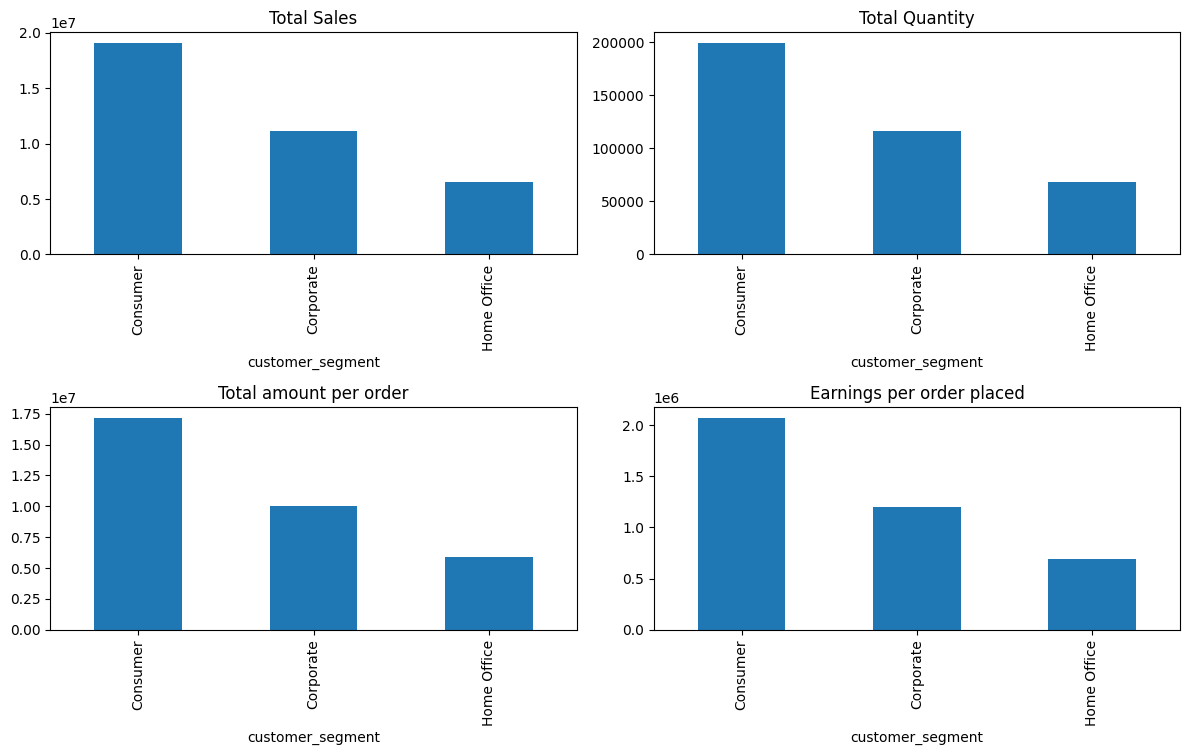

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Customer['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

plt.subplot(4, 2, 2)
Customer['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

plt.subplot(4, 2, 3)
Customer['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total amount per order")

plt.subplot(4, 2, 4)
Customer['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()

data_Customer_Segment=SCData.groupby(['customer_segment'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Customer_Segment, values='order_item_quantity', names= 'customer_segment' , title= 'Number of Orders per Customer Segments',
       color='customer_segment',
             color_discrete_map={'Consumer':'darkblue',
                                 'Corporate':'cyan',
                                 'Home Office':'royalblue'})

Market Analysis

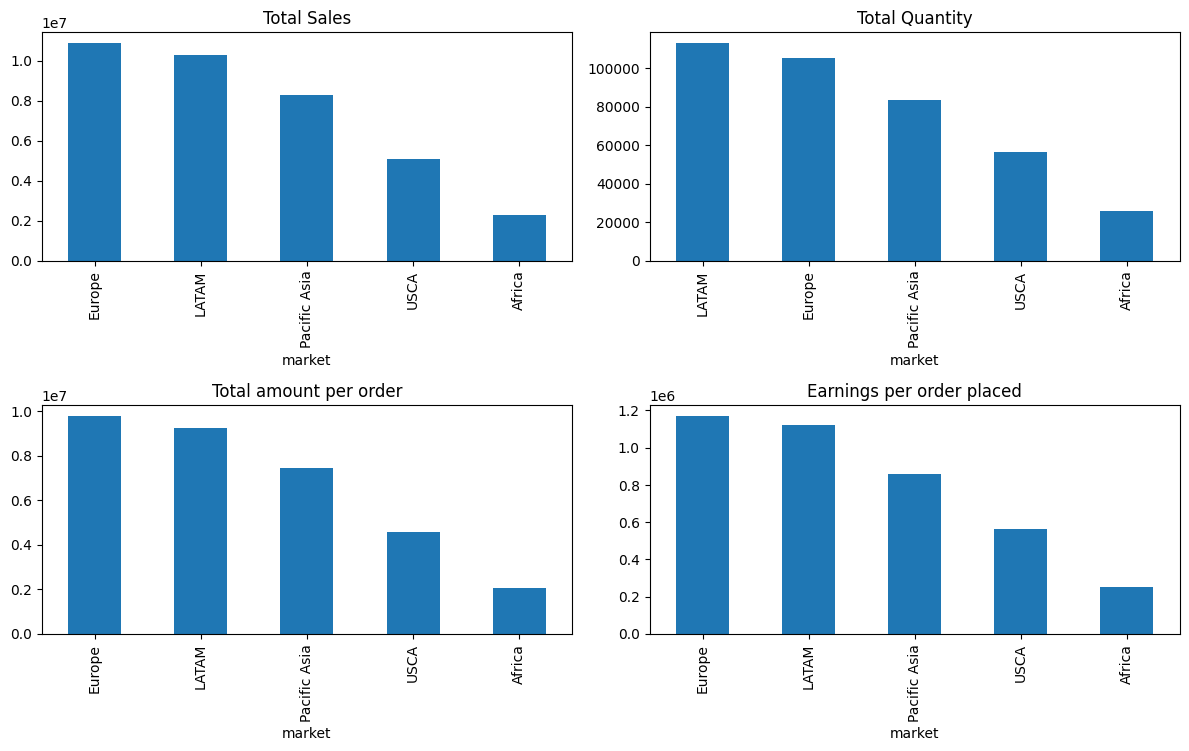

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Market['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

plt.subplot(4, 2, 2)
Market['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

plt.subplot(4, 2, 3)
Market['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(18,14), title="Total amount per order")

plt.subplot(4, 2, 4)
Market['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()

data_Market=SCData.groupby(['market'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Market, values='order_item_quantity', names= 'market' , title= 'Number of Orders per Market',
       color='market',
             color_discrete_map={'Europe':'darkblue',
                                 'LATAM':'magenta',
                                 'Pacific Asia':'green',
                              'USCA':'yellow',
                                'Africa':'royalblue'})

# How many orders experienced late delivery?

In [ ]:
# prompt: How many orders experienced late delivery?

late_delivery_count = SCData[SCData['delivery_status'] == 'Late delivery']['order_id'].count()
print(f"Number of orders with late delivery: {late_delivery_count}")


Number of orders with late delivery: 98977


# What is the distribution of orders by region or market?

Order Distribution by Region:
 order_region
Canada               959
Caribbean           8318
Central Africa      1677
Central America    28341
Central Asia         553
East Africa         1852
East of USA         6915
Eastern Asia        7280
Eastern Europe      3920
North Africa        3232
Northern Europe     9792
Oceania            10148
South America      14935
South Asia          7731
South of  USA       4045
Southeast Asia      9539
Southern Africa     1157
Southern Europe     9431
US Center           5887
West Africa         3696
West Asia           6009
West of USA         7993
Western Europe     27109
Name: order_id, dtype: int64

Order Distribution by Market:
 market
Africa          11614
Europe          50252
LATAM           51594
Pacific Asia    41260
USCA            25799
Name: order_id, dtype: int64


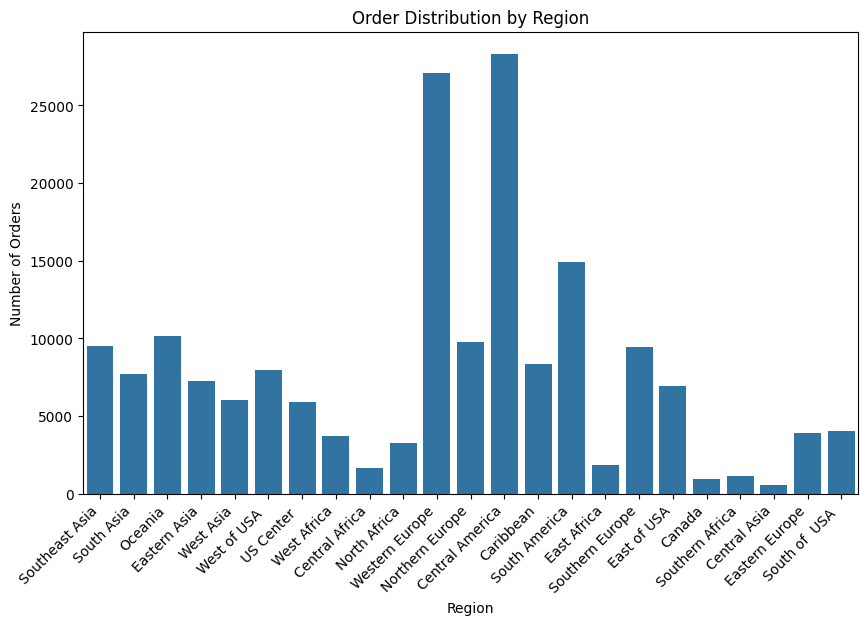

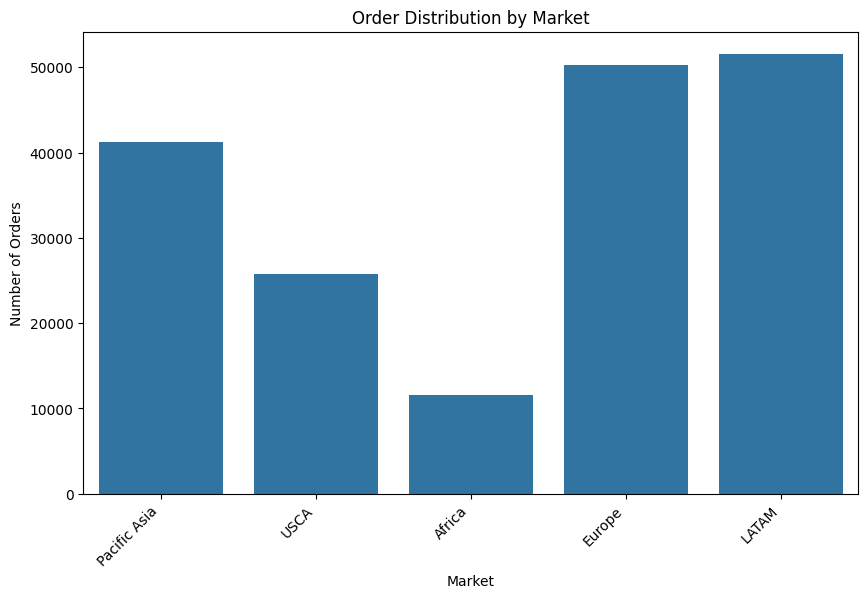

In [ ]:
# prompt: What is the distribution of orders by region or market?

# Order Distribution by Region
region_order_counts = SCData.groupby('order_region')['order_id'].count()
print("Order Distribution by Region:\n", region_order_counts)

# Order Distribution by Market
market_order_counts = SCData.groupby('market')['order_id'].count()
print("\nOrder Distribution by Market:\n", market_order_counts)

# Visualize Order Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='order_region', data=SCData)
plt.title('Order Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize Order Distribution by Market
plt.figure(figsize=(10, 6))
sns.countplot(x='market', data=SCData)
plt.title('Order Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()


# What percentage of orders were suspected of fraud?

In [ ]:
# prompt: What percentage of orders were suspected of fraud?

# Calculate the number of orders suspected of fraud
fraud_orders = SCData[SCData['order_status'] == 'SUSPECTED_FRAUD']['order_id'].count()

# Calculate the total number of orders
total_orders = SCData['order_id'].count()

# Calculate the percentage of orders suspected of fraud
fraud_percentage = (fraud_orders / total_orders) * 100

print(f"Percentage of orders suspected of fraud: {fraud_percentage:.2f}%")


Percentage of orders suspected of fraud: 2.25%


In [ ]:
# calculate actual delivery time expect when delivery_status is not equal Shipping canceled

import pandas as pd
import numpy as np

# Assuming SCData is your DataFrame and it has columns 'shipping_date_dateorders', 'order_date_dateorders', and 'delivery_status'

# Convert date columns to datetime objects if they are not already
SCData['shipping_date_dateorders'] = pd.to_datetime(SCData['shipping_date_dateorders'])
SCData['order_date_dateorders'] = pd.to_datetime(SCData['order_date_dateorders'])

# Calculate the delivery time only for rows where delivery_status is not 'Shipping canceled'
SCData['delivery_time'] = np.where(SCData['delivery_status'] != 'Shipping canceled',
                                     (SCData['shipping_date_dateorders'] - SCData['order_date_dateorders']).dt.days,
                                     np.nan)  # Set to NaN for 'Shipping canceled' rows

# Display the updated DataFrame with the 'delivery_time' column
SCData[['order_date_dateorders', 'shipping_date_dateorders', 'delivery_status', 'delivery_time']]


order_date_dateorders shipping_date_dateorders   delivery_status  \
0                 2018-01-31               2018-02-03  Advance shipping   
1                 2018-01-13               2018-01-18     Late delivery   
2                 2018-01-13               2018-01-17  Shipping on time   
3                 2018-01-13               2018-01-16  Advance shipping   
4                 2018-01-13               2018-01-15  Advance shipping   
...                      ...                      ...               ...   
180514            2016-01-16               2016-01-20  Shipping on time   
180515            2016-01-16               2016-01-19     Late delivery   
180516            2016-01-15               2016-01-20     Late delivery   
180517            2016-01-15               2016-01-18  Advance shipping   
180518            2016-01-15               2016-01-19  Shipping on time   

        delivery_time  
0                 3.0  
1                 5.0  
2                 4.0  
3                 3.0  
4                 2.0  
...               ...  
180514            4.0  
180515            3.0  
180516            5.0  
180517            3.0  
180518            4.0  

[180519 rows x 4 columns]

from matplotlib import pyplot as plt
_df_11['delivery_time'].plot(kind='hist', bins=20, title='delivery_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('delivery_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['order_date_dateorders']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'order_date_dateorders'}, axis=1)
              .sort_values('order_date_dateorders', ascending=True))
  xs = counted['order_date_dateorders']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('order_date_dateorders', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('delivery_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='delivery_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date_dateorders')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['shipping_date_dateorders']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'shipping_date_dateorders'}, axis=1)
              .sort_values('shipping_date_dateorders', ascending=True))
  xs = counted['shipping_date_dateorders']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('shipping_date_dateorders', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('delivery_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='delivery_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('shipping_date_dateorders')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['delivery_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'delivery_time'}, axis=1)
              .sort_values('delivery_time', ascending=True))
  xs = counted['delivery_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('delivery_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('delivery_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='delivery_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('delivery_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['delivery_time'].plot(kind='line', figsize=(8, 4), title='delivery_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['delivery_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='delivery_time', y='delivery_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# prompt: What is the average delivery time across all orders?

average_delivery_time = SCData['delivery_time'].mean()
print(f"Average delivery time across all orders: {average_delivery_time:.2f} days")


Average delivery time across all orders: 3.50 days


In [ ]:
# prompt: reason for negative value for column benefit_per_order

# Identify rows with negative benefit_per_order
negative_benefit_rows = SCData[SCData['benefit_per_order'] < 0]

# Analyze the data for potential reasons
negative_benefit_rows[['sales', 'order_item_discount_rate', 'order_item_profit_ratio', 'benefit_per_order']]

# Possible reasons for negative benefit_per_order:
# 1. High discount rates: Check if high discount rates on items are leading to negative profit.
# 2. Low profit ratios: Verify if certain products have very low or even negative profit ratios.
# 3. Errors in calculation: Inspect the calculation method for benefit_per_order to ensure accuracy.

# Further exploration:
# You could group the data by product category or other relevant factors to see if specific product types are more likely to have a negative benefit_per_order.
# You could also investigate the relationship between discount rates and profit ratios to identify potential patterns.


sales  order_item_discount_rate  order_item_profit_ratio  \
1       327.750000                      0.05                    -0.80   
2       327.750000                      0.06                    -0.80   
15      327.750000                      0.01                    -0.80   
16      327.750000                      0.02                    -0.77   
28      327.750000                      0.17                    -0.06   
...            ...                       ...                      ...   
180495  399.980011                      0.25                    -0.80   
180498  399.980011                      0.02                    -0.86   
180499  399.980011                      0.03                    -0.67   
180506  399.980011                      0.12                    -0.19   
180515  399.980011                      0.01                    -1.55   

        benefit_per_order  
1             -249.089996  
2             -247.779999  
15            -259.579987  
16            -246.360001  
28             -17.139999  
...                   ...  
180495        -239.990005  
180498        -337.100006  
180499        -258.779999  
180506         -65.470001  
180515        -613.770019  

[33784 rows x 4 columns]

from matplotlib import pyplot as plt
_df_0['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['order_item_discount_rate'].plot(kind='hist', bins=20, title='order_item_discount_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['order_item_profit_ratio'].plot(kind='hist', bins=20, title='order_item_profit_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['benefit_per_order'].plot(kind='hist', bins=20, title='benefit_per_order')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sales', y='order_item_discount_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='order_item_discount_rate', y='order_item_profit_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='order_item_profit_ratio', y='benefit_per_order', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['order_item_discount_rate'].plot(kind='line', figsize=(8, 4), title='order_item_discount_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['order_item_profit_ratio'].plot(kind='line', figsize=(8, 4), title='order_item_profit_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['benefit_per_order'].plot(kind='line', figsize=(8, 4), title='benefit_per_order')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Export the DataFrame to a CSV file
SC.to_csv('exported_dataframe.csv', index=False)  # Set index=False to avoid saving the index column